# Padronização

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [179]:
df = pd.read_excel('pokemon_data_tratado.xlsx')
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

KeyError: "['Unnamed: 0.1'] not found in axis"

In [ ]:
display(df.isnull().sum())

Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [ ]:
display(df.dtypes)

Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [ ]:
atrib = df.drop(columns = 'Is_legendary', axis = 1)
resp = df['Is_legendary'].values

atrib

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65
1061,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40
1062,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60
1063,713,Avalugg Hisuian Avalugg,Ice,Rock,514,95,127,184,34,36,38


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
label_encoder = LabelEncoder()

for column_name in atrib:
    column_dtype = atrib[column_name].dtype
    if column_dtype == 'object':
        atrib[column_name] = label_encoder.fit_transform(atrib[column_name])

df_testinho = pd.DataFrame(atrib)
display(df_testinho)

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,97,9,13,318,45,49,49,65,65,45
1,2,444,9,13,405,60,62,63,80,80,60
2,3,987,9,13,525,80,82,83,100,100,80
3,4,127,6,6,309,39,52,43,60,50,65
4,5,128,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,88,14,7,510,110,83,70,112,70,65
1061,705,838,16,2,452,58,75,83,83,113,40
1062,706,362,16,2,600,80,100,100,110,150,60
1063,713,42,11,15,514,95,127,184,34,36,38


In [ ]:
#pre processador para atributos
preprocess = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['int']))])

In [ ]:
atrib_pre = pd.DataFrame(preprocess.fit_transform(atrib), columns= preprocess.get_feature_names_out())
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-1.661643,-1.414915,-0.052296,0.778102,-0.968370,-0.937452,-0.965580,-0.798743,-0.151265,-0.183577,-0.766067
1,-1.658254,-0.286236,-0.052296,0.778102,-0.189966,-0.370831,-0.527744,-0.317094,0.355012,0.380826,-0.247709
2,-1.654865,1.479969,-0.052296,0.778102,0.883695,0.384664,0.145851,0.370977,1.030048,1.133363,0.443436
3,-1.651476,-1.317335,-0.596550,-0.635336,-1.048895,-1.164100,-0.864541,-1.005165,-0.320024,-0.747979,-0.074923
4,-1.648087,-1.314082,-0.596550,-0.635336,-0.189966,-0.446380,-0.460384,-0.489112,0.355012,-0.183577,0.443436
...,...,...,...,...,...,...,...,...,...,...,...
1060,0.463267,-1.444189,0.854794,-0.433416,0.749488,1.517906,0.179530,-0.076269,1.435069,0.004558,-0.074923
1061,0.724220,0.995320,1.217631,-1.443015,0.230552,-0.446380,-0.089907,0.370977,0.456267,1.622512,-0.938853
1062,0.727609,-0.552955,1.217631,-1.443015,1.554734,0.384664,0.752086,0.955837,1.367566,3.014706,-0.247709
1063,0.751332,-1.593813,0.310540,1.181941,0.785277,0.951285,1.661438,3.845733,-1.197571,-1.274755,-1.007968


In [ ]:
atrib_pre = atrib_pre[atrib.columns.values]
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-1.661643,-1.414915,-0.052296,0.778102,-0.968370,-0.937452,-0.965580,-0.798743,-0.151265,-0.183577,-0.766067
1,-1.658254,-0.286236,-0.052296,0.778102,-0.189966,-0.370831,-0.527744,-0.317094,0.355012,0.380826,-0.247709
2,-1.654865,1.479969,-0.052296,0.778102,0.883695,0.384664,0.145851,0.370977,1.030048,1.133363,0.443436
3,-1.651476,-1.317335,-0.596550,-0.635336,-1.048895,-1.164100,-0.864541,-1.005165,-0.320024,-0.747979,-0.074923
4,-1.648087,-1.314082,-0.596550,-0.635336,-0.189966,-0.446380,-0.460384,-0.489112,0.355012,-0.183577,0.443436
...,...,...,...,...,...,...,...,...,...,...,...
1060,0.463267,-1.444189,0.854794,-0.433416,0.749488,1.517906,0.179530,-0.076269,1.435069,0.004558,-0.074923
1061,0.724220,0.995320,1.217631,-1.443015,0.230552,-0.446380,-0.089907,0.370977,0.456267,1.622512,-0.938853
1062,0.727609,-0.552955,1.217631,-1.443015,1.554734,0.384664,0.752086,0.955837,1.367566,3.014706,-0.247709
1063,0.751332,-1.593813,0.310540,1.181941,0.785277,0.951285,1.661438,3.845733,-1.197571,-1.274755,-1.007968


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(atrib_pre, resp, test_size = 0.25, random_state = 420)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV

classificador_knn = knn()

parametros = {'n_neighbors': range(1, 30)}

print(parametros)

grid = GridSearchCV(classificador_knn, parametros,cv=5)
grid.fit(xtrain, ytrain)

print(f"Melhor valor de k: {grid.best_params_}")
print(f"Melhor classificador:{grid.best_estimator_}")
print(f"Melhor score (médio):{grid.best_score_*100:.2f}%")

#criando classificador
k = 5
classificador_knn = knn(n_neighbors=k)
#classificando
classificador_knn.fit(xtrain, ytrain)

{'n_neighbors': range(1, 30)}
Melhor valor de k: {'n_neighbors': 5}
Melhor classificador:KNeighborsClassifier()
Melhor score (médio):95.36%


KNeighborsClassifier()

<Axes: >

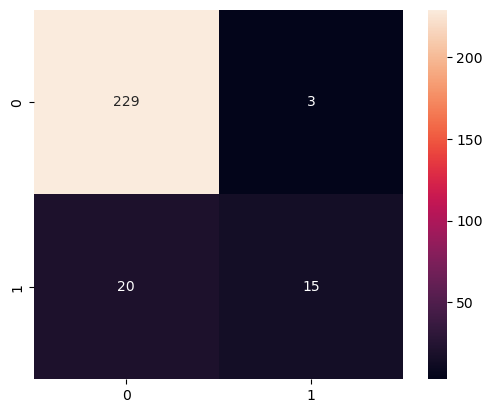

In [ ]:

grid.fit(xtrain, ytrain)
y_pred =grid.predict(xtest)

matriz_confusao = confusion_matrix(ytest,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_knn.classes_, xticklabels = classificador_knn.classes_,fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report
classi = classification_report(ytest, y_pred)


print(classi)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       232
           1       0.83      0.43      0.57        35

    accuracy                           0.91       267
   macro avg       0.88      0.71      0.76       267
weighted avg       0.91      0.91      0.90       267



In [ ]:
previsoes_knn = classificador_knn.predict(xtest)
print(previsoes_knn)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(ytest, previsoes_knn)

print(f'{acc*100:.7f}% accuracy')

91.3857678% accuracy


# Normalização

In [ ]:
df = pd.read_excel('pokemon_data_tratado.xlsx')
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1061,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1062,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0
1063,713,Avalugg Hisuian Avalugg,Ice,Rock,514,95,127,184,34,36,38,0


In [ ]:
display(df.isnull().sum())

Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [ ]:
display(df.dtypes)

Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [ ]:
atrib = df.drop(columns = 'Is_legendary', axis = 1)
resp = df['Is_legendary'].values

atrib

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65
1061,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40
1062,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60
1063,713,Avalugg Hisuian Avalugg,Ice,Rock,514,95,127,184,34,36,38


In [ ]:
label_encoder = LabelEncoder()

for column_name in atrib:
    column_dtype = atrib[column_name].dtype
    if column_dtype == 'object':
        atrib[column_name] = label_encoder.fit_transform(atrib[column_name])

df_testinho = pd.DataFrame(atrib)
display(df_testinho)

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,97,9,13,318,45,49,49,65,65,45
1,2,444,9,13,405,60,62,63,80,80,60
2,3,987,9,13,525,80,82,83,100,100,80
3,4,127,6,6,309,39,52,43,60,50,65
4,5,128,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,88,14,7,510,110,83,70,112,70,65
1061,705,838,16,2,452,58,75,83,83,113,40
1062,706,362,16,2,600,80,100,100,110,150,60
1063,713,42,11,15,514,95,127,184,34,36,38


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#pre processador para atributos
preprocess = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('MinMaxScaler', MinMaxScaler(), make_column_selector(dtype_include=['float']))])

In [ ]:
atrib_pre = pd.DataFrame(preprocess.fit_transform(atrib), columns= preprocess.get_feature_names_out())
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,97,9,13,318,45,49,49,65,65,45
1,2,444,9,13,405,60,62,63,80,80,60
2,3,987,9,13,525,80,82,83,100,100,80
3,4,127,6,6,309,39,52,43,60,50,65
4,5,128,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,88,14,7,510,110,83,70,112,70,65
1061,705,838,16,2,452,58,75,83,83,113,40
1062,706,362,16,2,600,80,100,100,110,150,60
1063,713,42,11,15,514,95,127,184,34,36,38


In [ ]:
atrib_pre = atrib_pre[atrib.columns.values]
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,97,9,13,318,45,49,49,65,65,45
1,2,444,9,13,405,60,62,63,80,80,60
2,3,987,9,13,525,80,82,83,100,100,80
3,4,127,6,6,309,39,52,43,60,50,65
4,5,128,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1060,628,88,14,7,510,110,83,70,112,70,65
1061,705,838,16,2,452,58,75,83,83,113,40
1062,706,362,16,2,600,80,100,100,110,150,60
1063,713,42,11,15,514,95,127,184,34,36,38


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(atrib_pre, resp, test_size = 0.25, random_state = 69)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV

classificador_knn = knn()

kvalo = {'n_neighbors': range(1, 30)}

grid = GridSearchCV(classificador_knn, parametros,cv=5)
grid.fit(xtrain, ytrain)

print(f"Melhor valor de k: {grid.best_params_}")
print(f"Melhor classificador:{grid.best_estimator_}")
print(f"Melhor score (médio):{grid.best_score_*100:.2f}%")

#criando classificador
k = 3
classificador_knn = knn(n_neighbors=k)
#classificando
classificador_knn.fit(xtrain, ytrain)

Melhor valor de k: {'n_neighbors': 3}
Melhor classificador:KNeighborsClassifier(n_neighbors=3)
Melhor score (médio):95.11%


KNeighborsClassifier(n_neighbors=3)

<Axes: >

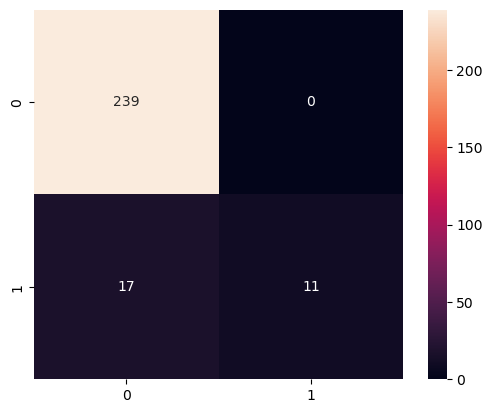

In [ ]:
grid.fit(xtrain, ytrain)
y_pred =grid.predict(xtest)

matriz_confusao = confusion_matrix(ytest,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_knn.classes_, xticklabels = classificador_knn.classes_,fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classi = classification_report(ytest, y_pred)


print(classi)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       239
           1       1.00      0.39      0.56        28

    accuracy                           0.94       267
   macro avg       0.97      0.70      0.76       267
weighted avg       0.94      0.94      0.92       267



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(ytest, previsoes_knn)

print(f'{acc*100:.7f}% accuracy')

84.2696629% accuracy
